# Qiskit Basics

In [43]:
import qiskit 

In [44]:
qiskit.__qiskit_version__ #check the version of qiskit installed

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.5.0',
 'qiskit-aqua': '0.6.4',
 'qiskit': '0.16.0'}

In [45]:
from qiskit import IBMQ 

We enter our API token inorder to access IBM quantum devices.

In [48]:
IBMQ.save_account('2e72c62a28b589a522c11ca7a48f51278b32baa8d6c4777e8f1907204dd656b89bd2ee478c3fc8a3c5e54e2d0ae9952a37ac3ff6bd37923fd16c61c373aa583e')

Credentials already present. Set overwrite=True to overwrite.


Here we load the account to see we have access to the device.

In [49]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [50]:
from qiskit import * 

Now we build a 2 qubit quantum circuit.

In [51]:
qr = QuantumRegister(2) #create a 2 qubit quantum register

In [52]:
cr = ClassicalRegister(2) #create a 2 bit classical register

We create a 2 bit classical register inorder to take measurements from these qubits. 
We can now create a circuit using the two.

In [53]:
circuit = QuantumCircuit(qr,cr) #create the quantum circuit

We can draw the circuit out by doing the following:

In [54]:
%matplotlib inline 
circuit.draw()

q2_0: |0>
         
q2_1: |0>
         
 c2_0: 0 
         
 c2_1: 0

Now we can add gates into the circuit.

 First step to create entanglement is to apply a Hadamard gate.

In [55]:
circuit.h(qr[0]) #apply hadamard to the first quibit

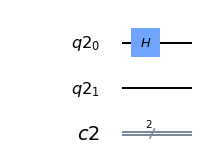

In [56]:
circuit.draw(output='mpl')

Now we create a two qubit operation called Controlled X.

In [57]:
circuit.cx(qr[0],qr[1]) #controlled X gate with controlled 1st qubit and target 2nd qubit 

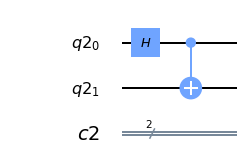

In [58]:
circuit.draw(output='mpl')

With these two quantum operations, we are able to generate entanglment between the two qubits.

We now want to measure the qubits and store the measurements into the classical bits

In [59]:
circuit.measure(qr,cr) #take masurement from q-register and store in c-register

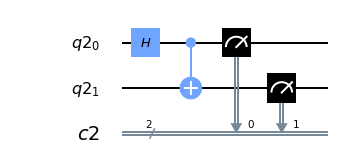

In [60]:
circuit.draw(output='mpl')

We want to simulate the circuit by using the Aer component of qiskit. Aer is what we use for simulations of our quantum circuits on our local computer.

In [61]:
simulator = Aer.get_backend('qasm_simulator') #importing simulator from Aer

In [62]:
result = execute(circuit, backend = simulator).result() #executing the circuit with our simulator as the backend

As we want to visualise our results from the result variable, we do the following to get the results as a histogram.

In [63]:
from qiskit.tools.visualization import plot_histogram

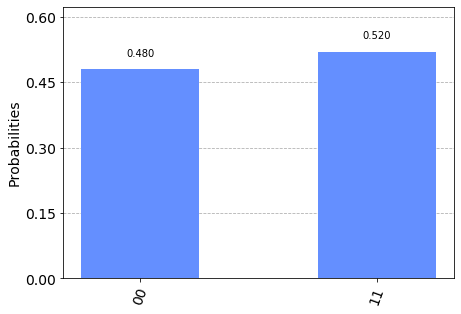

In [64]:
plot_histogram(result.get_counts(circuit))

Now we can see what happens on an actual quantum computer at IBM.

In [65]:
IBMQ.load_account() #load the account

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [66]:
provider = IBMQ.get_provider('ibm-q') 

In [68]:
qcomp = provider.get_backend('ibmq_16_melbourne') #the device we are working with

In [69]:
job = execute(circuit, backend=qcomp) #job is tp execute our circuit

In [70]:
from qiskit.tools.monitor import job_monitor

In [71]:
job_monitor(job) #check the position in queue

Job Status: job has successfully run


In [72]:
result = job.result() #get the results

Now we can plot the results from the qunatum device.

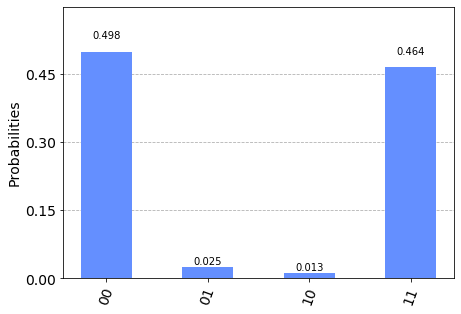

In [75]:
plot_histogram(result.get_counts(circuit))

The difference is we get 01 and 10 states on the real quantum device compared to the simulator. This is because the simulator simulates a perfect quantum device whereas the real one has small errors.